In [12]:
# HOUSE PRICE PREDICTION

In [14]:
print("""## Dataset Overview

We'll use the California housing dataset from scikit-learn, which contains information about housing districts in California from the 1990 census. This dataset includes features like median income, housing median age, average rooms, and other characteristics that can help predict median house values.""")

## Dataset Overview

We'll use the California housing dataset from scikit-learn, which contains information about housing districts in California from the 1990 census. This dataset includes features like median income, housing median age, average rooms, and other characteristics that can help predict median house values.


In [7]:
# Install required packages
!pip install scikit-learn pandas numpy matplotlib seaborn

  Using cached scikit_learn-1.7.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached pandas-2.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pandas-2.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached numpy-2.3.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached numpy-2.3.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.5-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached matplotlib-3.10.5-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.16.1-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached scipy-1.16.1-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 k

In [9]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the California housing dataset
housing = fetch_california_housing()

# Create a DataFrame with the features
df = pd.DataFrame(housing.data, columns=housing.feature_names)


In [10]:
# Add the target variable (house prices)
df['target'] = housing.target

print(f"Dataset shape: {df.shape}")
print("\nFeature names:")
print(housing.feature_names)
print("\nFirst few rows:")
print(df.head())

Dataset shape: (20640, 9)

Feature names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First few rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

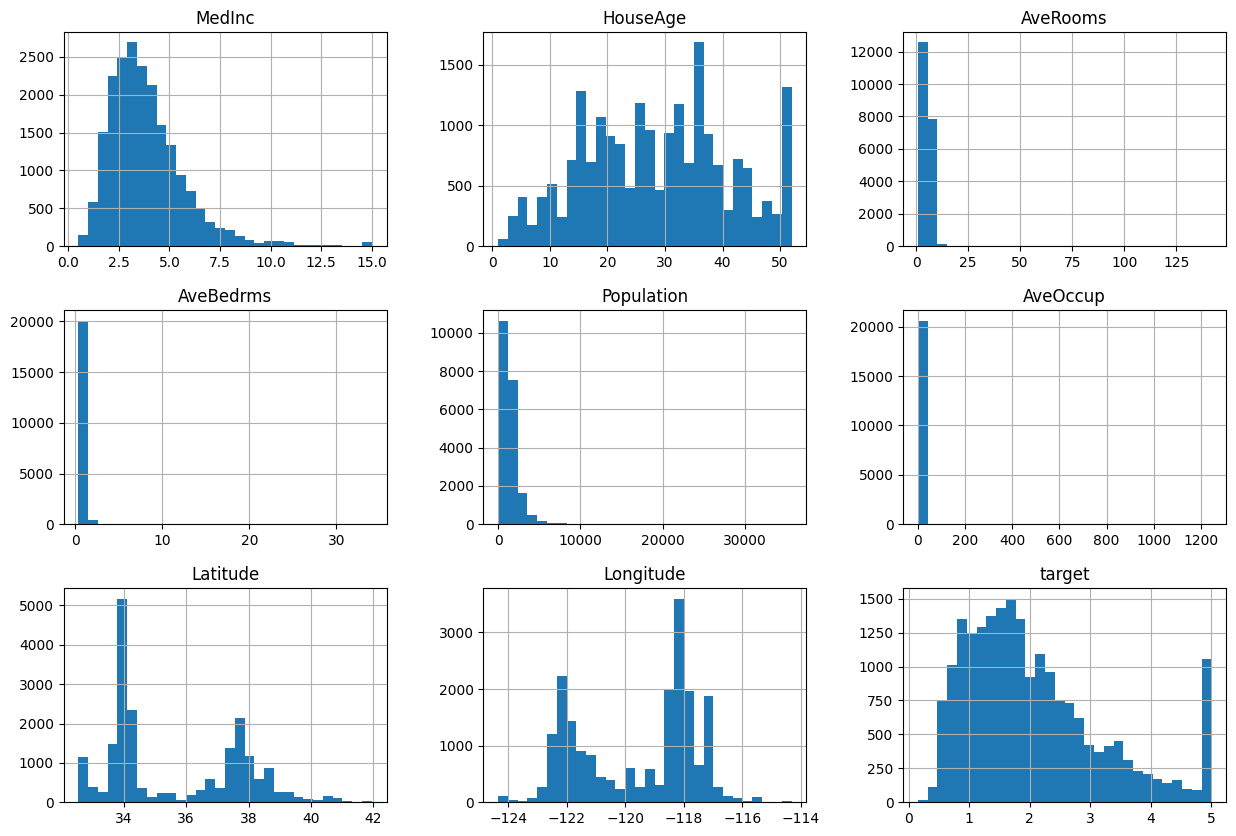

In [ ]:
# Visualization and further analysis

df.hist(bins=30, figsize=(15, 10))

In [15]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


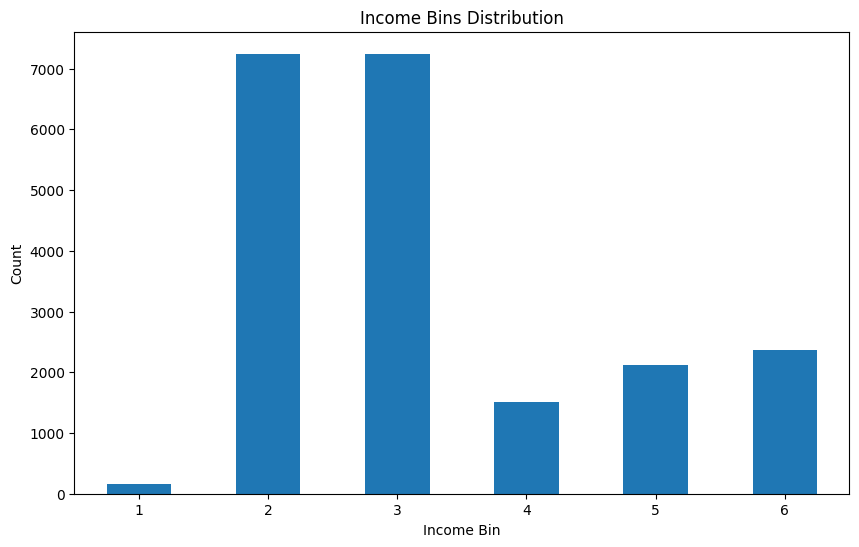

Income Bins Distribution with Min/Max Values:
--------------------------------------------------
Bin 0: Count =  148, Range = [0.00, 1.00)
Bin 1: Count =  588, Range = [1.00, 3.00)
Bin 2: Count = 1511, Range = [3.00, 4.50)
Bin 3: Count = 2251, Range = [4.50, 5.00)
Bin 4: Count = 2496, Range = [5.00, 6.00)
Bin 5: Count = 2689, Range = [6.00, inf)


In [48]:
import matplotlib.pyplot as plt
import numpy as np


incomeBand = [0, 1.0, 3.0, 4.5, 5.0, 6.0, np.inf]
df['MedIncomeCat'] = pd.cut(df['MedInc'], bins=incomeBand, labels=[1,2,3,4,5,6])
# Get the bin edges to show min/max values
bin_edges = pd.cut(df['MedIncomeCat'], bins=incomeBand, retbins=True)[1]

# Show income bins distribution
plt.figure(figsize=(10, 6))
df['MedIncomeCat'].value_counts().sort_index().plot(kind='bar')
plt.title('Income Bins Distribution')
plt.xlabel('Income Bin')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Print the counts with min/max values for each bin
print("Income Bins Distribution with Min/Max Values:")
print("-" * 50)
for i in range(incomeBand.__len__() - 1):
    count = df['income_bin'].value_counts().sort_index().get(i, 0)
    min_val = bin_edges[i]
    max_val = bin_edges[i + 1]
    print(f"Bin {i}: Count = {count:4d}, Range = [{min_val:.2f}, {max_val:.2f})")

In [67]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['MedIncomeCat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

print("\nOriginal Dataset Proportions:")
original_props = df['MedIncomeCat'].value_counts().sort_index()/len(df)
print(original_props)

print("\nTraining Set Proportions:")
train_props = strat_train_set['MedIncomeCat'].value_counts().sort_index()/len(strat_train_set)
print(train_props)

print("\nTest Set Proportions:")
test_props = strat_test_set['MedIncomeCat'].value_counts().sort_index()/len(strat_test_set)
print(test_props)

strat_train_set.drop('MedIncomeCat', axis=1, inplace=True)
strat_test_set.drop('MedIncomeCat', axis=1, inplace=True)
strat_train_set.drop('income_bin', axis=1, inplace=True)
strat_test_set.drop('income_bin', axis=1, inplace=True)



Original Dataset Proportions:
MedIncomeCat
1    0.007703
2    0.350969
3    0.350581
4    0.073256
5    0.103052
6    0.114438
Name: count, dtype: float64

Training Set Proportions:
MedIncomeCat
1    0.007691
2    0.350957
3    0.350594
4    0.073280
5    0.103016
6    0.114462
Name: count, dtype: float64

Test Set Proportions:
MedIncomeCat
1    0.007752
2    0.351017
3    0.350533
4    0.073159
5    0.103198
6    0.114341
Name: count, dtype: float64


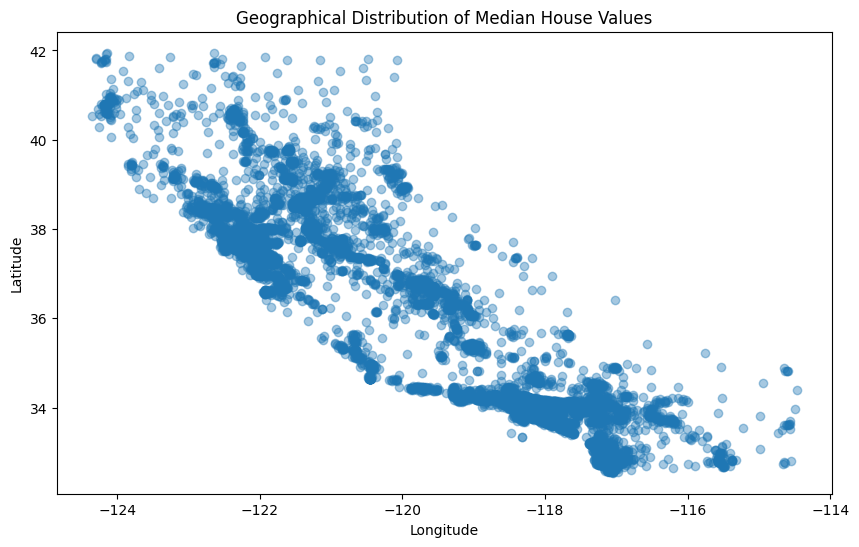

In [78]:
strat_train_set.describe()
# Scatter plot of latitude vs longitude and color by median house value
plt.figure(figsize=(10, 6))
plt.scatter(x=strat_train_set['Longitude'], y=strat_train_set['Latitude'],marker='o', alpha=0.4)
plt.title('Geographical Distribution of Median House Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/var/folders/tc/1kz5t3150y1cwpyphq32d0p00000gn/T/ipykernel_48762/2687727401.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


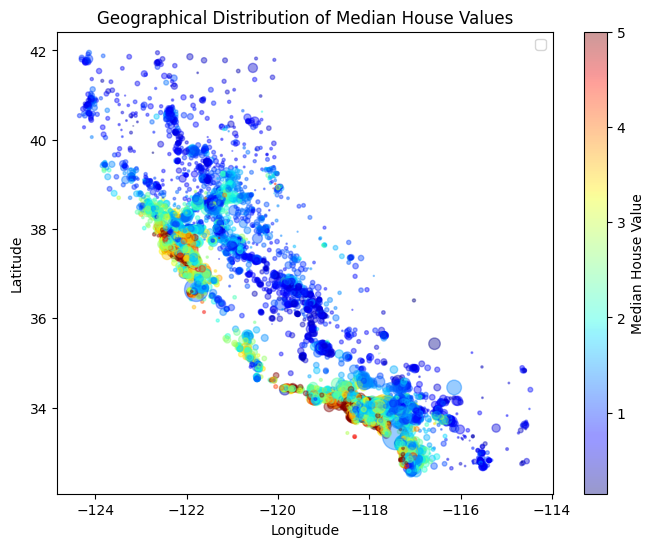

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(
    x=strat_train_set['Longitude'],
    y=strat_train_set['Latitude'],
    s=strat_train_set['Population'] / 100,
    c=strat_train_set['target'],
    cmap=plt.get_cmap("jet"),
    marker='o',
    alpha=0.4
)
plt.colorbar(label='Median House Value')
plt.title('Geographical Distribution of Median House Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [95]:
corr_matrix = strat_train_set.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.110495  0.309060  -0.059413    0.010007  0.022562   
HouseAge   -0.110495  1.000000 -0.146006  -0.075121   -0.295024  0.014904   
AveRooms    0.309060 -0.146006  1.000000   0.862153   -0.071231 -0.004748   
AveBedrms  -0.059413 -0.075121  0.862153   1.000000   -0.066532 -0.005517   
Population  0.010007 -0.295024 -0.071231  -0.066532    1.000000  0.074445   
AveOccup    0.022562  0.014904 -0.004748  -0.005517    0.074445  1.000000   
Latitude   -0.080528  0.011851  0.105510   0.070118   -0.112935  0.005352   
Longitude  -0.016840 -0.110235 -0.025286   0.014001    0.103149 -0.000316   
target      0.693554  0.112419  0.145768  -0.045606   -0.019681 -0.021766   

            Latitude  Longitude    target  
MedInc     -0.080528  -0.016840  0.693554  
HouseAge    0.011851  -0.110235  0.112419  
AveRooms    0.105510  -0.025286  0.145768  
AveBedrms   0.070118   0.014001 

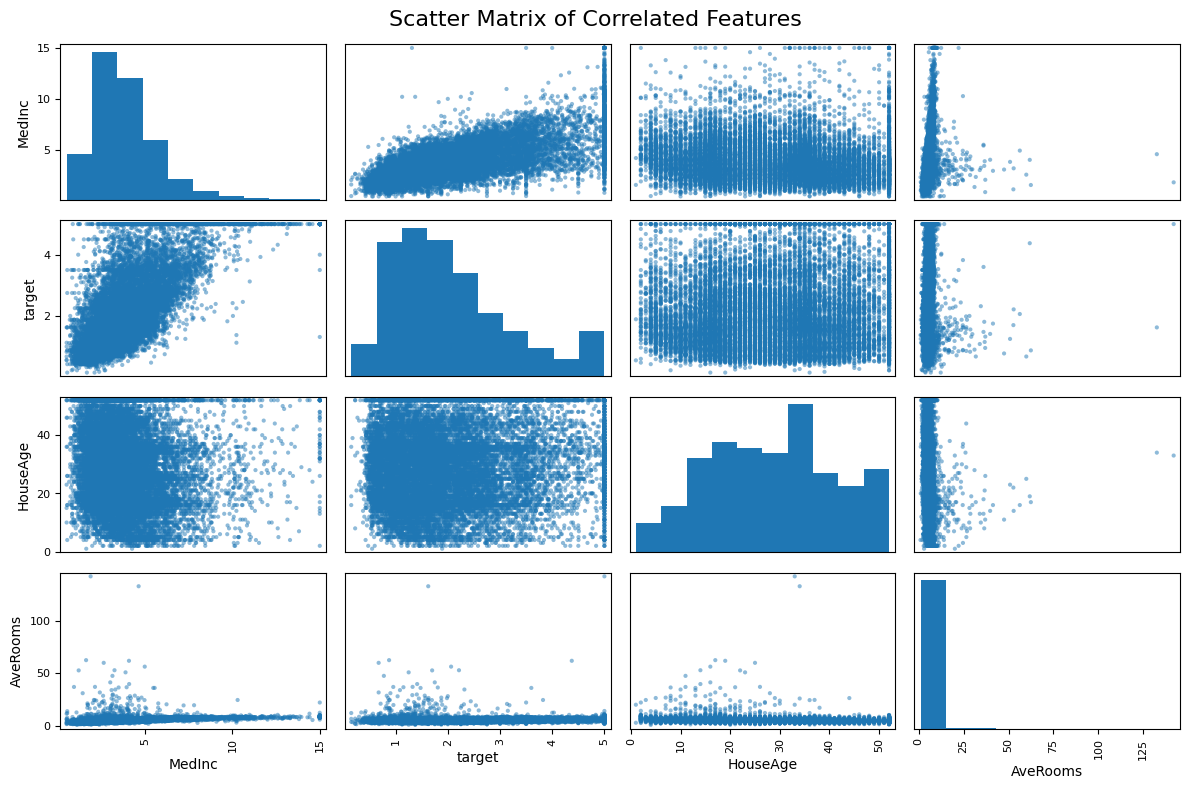

In [99]:
from pandas.plotting import scatter_matrix
correlated_features =["MedInc","target", "HouseAge", "AveRooms"]
scatter_matrix(strat_train_set[correlated_features], figsize=(12, 8))
plt.suptitle('Scatter Matrix of Correlated Features', fontsize=16)
plt.tight_layout()
plt.show()


# Combination of Attributes 

In [102]:
strat_train_set['rooms_per_household'] = strat_train_set['AveRooms'] / strat_train_set['AveOccup']
strat_train_set['bedrooms_per_room'] = strat_train_set['AveBedrms'] / strat_train_set['AveRooms']
strat_train_set['population_per_household'] = strat_train_set['Population'] / strat_train_set['AveOccup']
strat_train_set.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.872640,28.680414,5.447443,1.099431,1420.111797,3.096882,35.653375,-119.586122,2.065093,1.986334,0.212866,498.149830
std,1.912472,12.596534,2.618351,0.508164,1137.005342,11.591797,2.140458,2.007641,1.157238,1.212882,0.057930,383.677778
min,0.499900,1.000000,1.000000,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.002547,0.100000,1.000000
25%,2.562500,18.000000,4.445434,1.006045,781.000000,2.430323,33.940000,-121.810000,1.188000,1.526675,0.175188,278.000000
50%,3.535700,29.000000,5.236128,1.048900,1161.000000,2.814815,34.270000,-118.520000,1.795000,1.942523,0.202932,408.000000
75%,4.743250,37.000000,6.063937,1.099493,1718.000000,3.276411,37.720000,-118.010000,2.638000,2.298701,0.239501,601.250000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.470000,5.000010,55.222222,1.000000,6082.000000
